In [2]:
# !pip install pygrib matplotlib cartopy

In [1]:
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
grib_file = '/home/user/large-disk/aifs_grib_perturbations/grib_files/experiments_grib_files/20240302_orig_init.grb'  # Replace with the path to your GRIB file

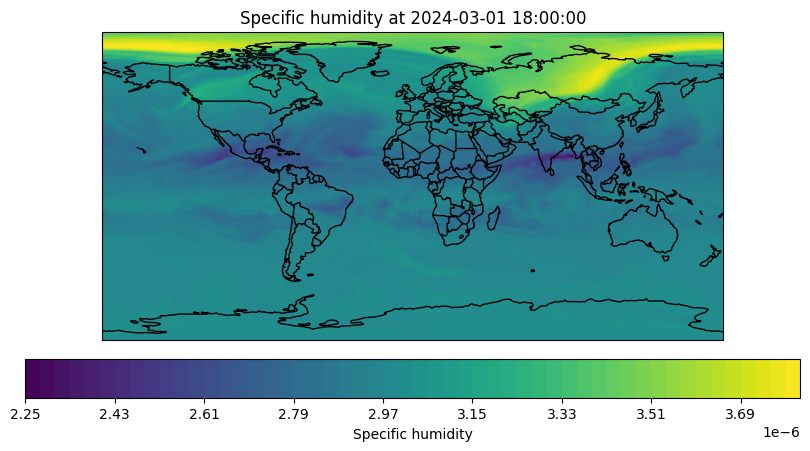

In [17]:
# Open the GRIB file
grib_file = '/home/user/large-disk/aifs_grib_perturbations/grib_files/experiments_grib_files/20240302_orig_init.grb'  # Replace with the path to your GRIB file
grbs = pygrib.open(grib_file)

# Select a specific message (typically, you can loop through to explore different fields)
grb = grbs.message(1)  # Replace with the desired message number
data, lats, lons = grb.data()

# Set up the plot with a map projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other features for context
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot the data
cs = ax.contourf(lons, lats, data, 60, transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label(grb.parameterName)

# Add a title
plt.title(f"{grb.parameterName} at {grb.analDate}")

# Show the plot
plt.show()

# Close the GRIB file
grbs.close()


In [3]:
variable = 'msl'
level = 0

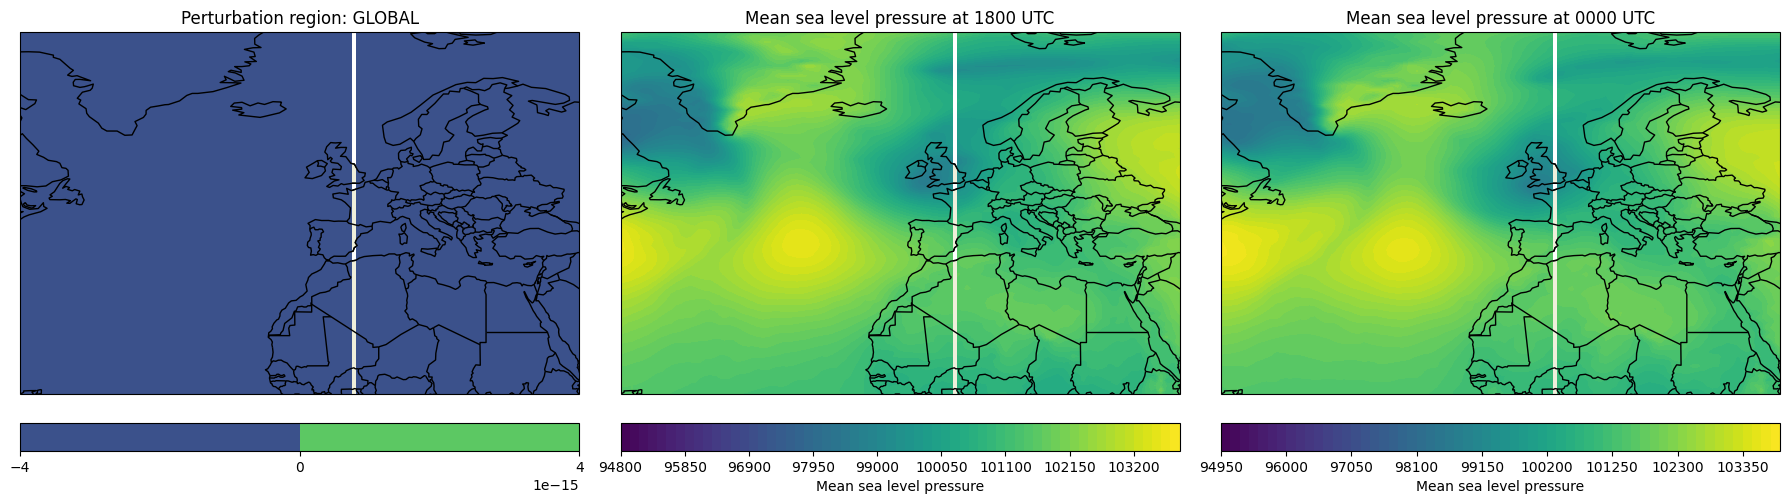

In [4]:
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon
import numpy as np

# set this to US East Coast, Atlantic and Europe
lonmin, lonmax = -65, 43
latmin, latmax = 10, 80

# Open the GRIB file
grib_file = '/home/user/large-disk/aifs_grib_perturbations/grib_files/experiments_grib_files/20240302_orig_init.grb'
grbs = pygrib.open(grib_file)

default_perturb_polygon = [[0,0], [0,0], [0,0], [0,0], [0,0]]

# Function to create map and plot GRIB data
def plot_grib_data(ax, grb, title, polygons=[], visualization_polygon=[lonmin, lonmax, latmin, latmax]):
    data, lats, lons = grb.data()
    if polygons:
        if polygons[0] != default_perturb_polygon:
            for pol in polygons:
                cs = ax.contourf(lons, lats, np.zeros((192,384)), 60, transform=ccrs.PlateCarree(), cmap='viridis')
                ax.coastlines()
                ax.add_feature(cfeature.BORDERS)
                ax.add_feature(cfeature.LAND, edgecolor='black')
                cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05, ax=ax)
                polygon = Polygon(pol, closed=True, edgecolor='red', facecolor='none', lw=2)
                ax.add_patch(polygon)
        else:
            cs = ax.contourf(lons, lats, np.zeros((192,384)), 60, transform=ccrs.PlateCarree(), cmap='viridis')
            ax.coastlines()
            ax.add_feature(cfeature.BORDERS)
            ax.add_feature(cfeature.LAND, edgecolor='black')
            cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05, ax=ax)
            title = f"{title}: GLOBAL"
    else:
        cs = ax.contourf(lons, lats, data, 60, transform=ccrs.PlateCarree(), cmap='viridis')
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND, edgecolor='black')
        cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05, ax=ax)
        cbar.set_label(grb.parameterName)
        
    ax.set_title(title)
    ax.set_extent(visualization_polygon, crs=ccrs.PlateCarree())

# Create a single figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 1. Plot the map and point out the polygons to be perturbed
ax1 = axes[0]
plot_grib_data(ax1, grbs[1], title='Perturbation region', polygons=[default_perturb_polygon])

# 2. Plot the GRIB variable at time 1800 on the second subplot
grb_1800 = None
for grb in grbs:
    if grb.validDate.hour == 18 and grb.validDate.minute == 0 and grb.shortName == variable and grb.level == level:
        grb_1800 = grb
        break

if grb_1800:
    ax2 = axes[1]
    if not level:
        plot_grib_data(ax2, grb_1800, f'{grb_1800.parameterName} at 1800 UTC')
    else:
        plot_grib_data(ax2, grb_1800, f'{grb_1800.parameterName} level {level} at 1800 UTC')
else:
    print("No data found for 1800 UTC.")

# 3. Plot the GRIB variable at time 0000 on the third subplot
grb_0000 = None
for grb in grbs:
    if grb.validDate.hour == 0 and grb.validDate.minute == 0 and grb.shortName == variable and grb.level == level:
        grb_0000 = grb
        break

if grb_0000:
    ax3 = axes[2]
    if not level:
        plot_grib_data(ax3, grb_0000, f'{grb_0000.parameterName} at 0000 UTC')
    else:
        plot_grib_data(ax3, grb_0000, f'{grb_0000.parameterName} level {level} at 0000 UTC')
else:
    print("No data found for 0000 UTC.")

# Close the GRIB file
grbs.close()

# Adjust layout
plt.tight_layout()

# Show the figure with the 3 subplots
plt.show()

In [29]:
from ipywidgets import *

import pygrib
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.widgets import Slider
from IPython.display import Javascript, display

from ipywidgets import interact
import ipywidgets as widgets

# --- Data Loading ---

# Path to your GRIB file
# grib_file = '/home/user/large-disk/aifs_grib_perturbations/grib_files/experiments_grib_files/20240302_orig_init.grb'
orig_grib_file = '/home/user/large-disk/aifs_grib_perturbations/grib_files/experiments_grib_files/20240302_orig_init_240h_pred.grb'
pert_grib_file = '/home/user/large-disk/aifs_grib_perturbations/grib_files/experiments_grib_files/20240302_pert_nao_plus_240h_pred.grb'

def get_data_and_timesteps(grib_file, variable=variable, level=level):
    # Open the GRIB file
    grbs = pygrib.open(grib_file)

    # Initialize lists
    data_list = []
    time_list = []

    # Iterate through each message (assuming each message is a different time point)
    for grb in grbs:
        if grb.shortName == variable and grb.level == level:
            valid_time = grb.validDate  # Format: YYYYMMDDHH
            time_list.append(valid_time)
            data, lats, lons = grb.data()
            data_list.append(data)

    grbs.close()

    # Convert to arrays
    data_array = np.array(data_list)  # Shape: (time, lat, lon)
    times = np.unique(time_list)       # Shape: (time,)

    return (data_array, times, lons, lats)

orig_data_array, date_range, lons, lats = get_data_and_timesteps(orig_grib_file)
pert_data_array, date_range, lons, lats = get_data_and_timesteps(pert_grib_file)

In [30]:
%matplotlib inline
from IPython.display import Javascript, display

from ipywidgets import interact
import ipywidgets as widgets

# set this to US East Coast, Atlantic and Europe
lonmin, lonmax = -65, 43
latmin, latmax = 10, 80

visualization_polygon=[lonmin, lonmax, latmin, latmax]

import time

def plot_func(time_value):
    # time_value = int(time_value)
    bar_res = 10
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    fig.suptitle(f'{variable} comparison' + (f' level {level}' if level else '') + f' @ {date_range[time_value]}', fontsize=16)

    ax0 = axes[0]

    orig_data = orig_data_array[time_value]

    cs = ax0.contourf(lons, lats, orig_data, bar_res, transform=ccrs.PlateCarree(), cmap='viridis')
    ax0.coastlines()
    ax0.add_feature(cfeature.BORDERS)
    ax0.add_feature(cfeature.LAND, edgecolor='black')
    cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05, ax=ax0)
    # cbar.set_label(f'{variable}' + (f' level {level}' if level else '') + f' @ {date_range[time_value]}') 
    cbar.set_label(f'Original')
    ax0.set_extent(visualization_polygon, crs=ccrs.PlateCarree())

    ax1 = axes[1]

    pert_data = pert_data_array[time_value]

    cs = ax1.contourf(lons, lats, pert_data, bar_res, transform=ccrs.PlateCarree(), cmap='viridis')
    ax1.coastlines()
    ax1.add_feature(cfeature.BORDERS)
    ax1.add_feature(cfeature.LAND, edgecolor='black')
    cbar = plt.colorbar(cs, orientation='horizontal', pad=0.05, ax=ax1)
    # cbar.set_label(f'Perturbed {variable}' + (f' level {level}' if level else '') + f' @ {date_range[time_value]}') 
    cbar.set_label(f'Perturbed') 
    ax1.set_extent(visualization_polygon, crs=ccrs.PlateCarree())
 
interact(plot_func, time_value=widgets.IntSlider(value=0, min=0, max=len(date_range), step=1, readout=False, description="", layout=widgets.Layout(width='100%')))


interactive(children=(IntSlider(value=0, description='time_value', layout=Layout(width='100%'), max=41, readou…

<function __main__.plot_func(time_value)>